


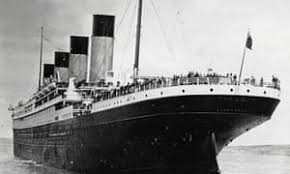

<br>
# <center> TITANIC <center> 

# Exploring the data and finding missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Mr. Ernesti Arvid",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Missing age, cabin and embarked data. <br> Should be able to do something about age, but there's too much cabin data missing to be able to sensibly estimate that variable.

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Missing info on the test set too. Again, age I can estimate, cabin I'll probably need to work without and there's one observation missing for fare, which I might not use yet.

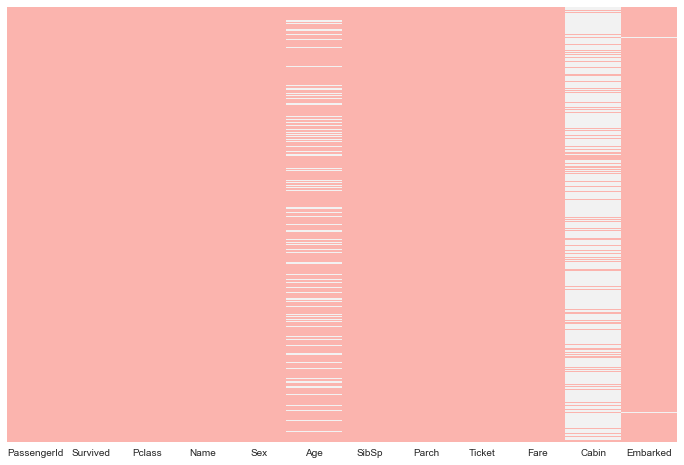

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='Pastel1')

In [11]:
df_train = train

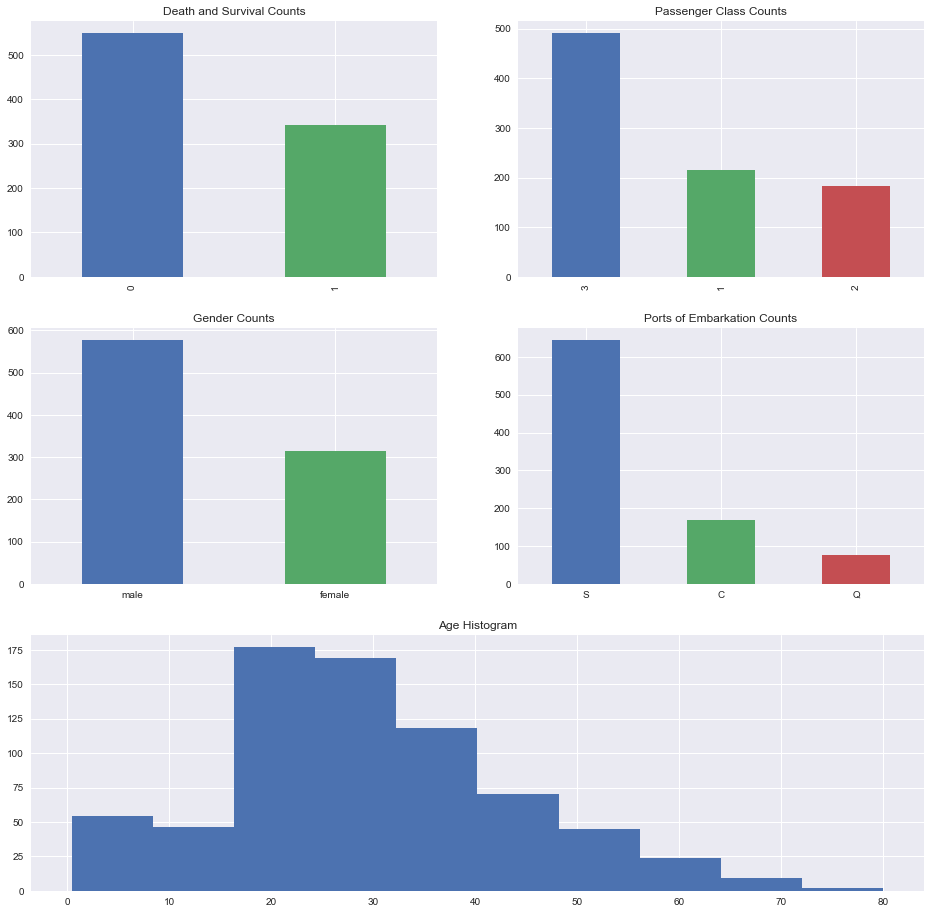

In [12]:
# Set up a grid of plots
fig = plt.figure(figsize=(16,16)) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')
plt.xticks(rotation=0)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0), colspan=2)
df_train['Age'].hist()
plt.title('Age Histogram')

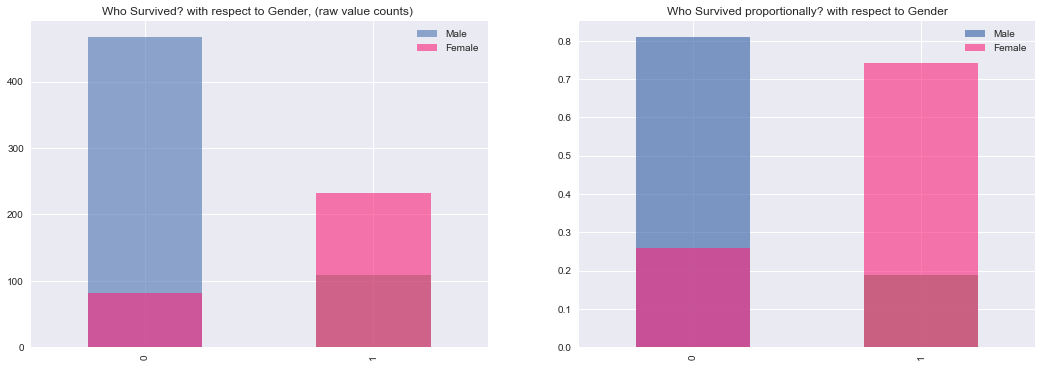

In [13]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 

df_male = df_train['Survived'][df_train.Sex == 'male'].value_counts().sort_index()
df_female = df_train.Survived[df_train.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121) # 1*2 grid, first grid
df_male.plot(kind='bar',label='Male', alpha=0.6)
df_female.plot(kind='bar', color='#FA2379',label='Female', alpha=0.6)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
#ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='bar',label='Male', alpha=0.7)  
(df_female/float(df_female.sum())).plot(kind='bar', color='#FA2379',label='Female', alpha=0.6)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

#ax2.set_ylim(-1, 2)

In [14]:
df_train.groupby(['Sex','Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

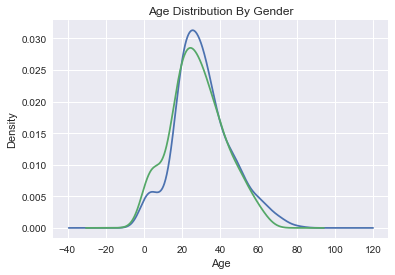

In [15]:
df_train.Age[df_train.Sex == 'male'].plot(kind='kde')    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde')

plt.title('Age Distribution By Gender')
plt.xlabel('Age')

Age distributed pretty evenly by gender, maybe it's impacted by class? 

C:\Users\Amarjeet\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


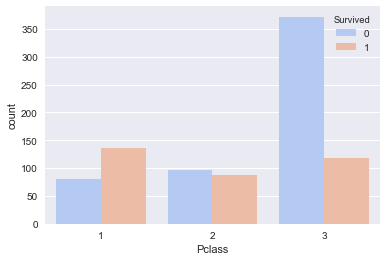

In [16]:
sns.countplot(train['Pclass'], hue = train['Survived'], palette='coolwarm')

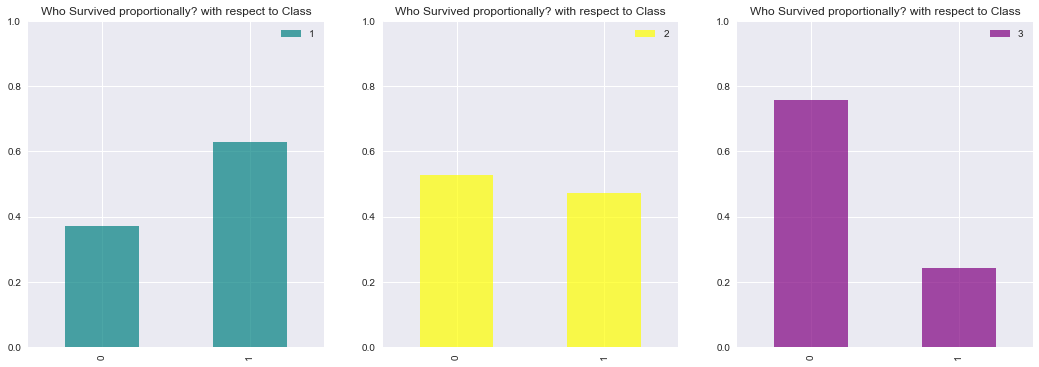

In [17]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 

df_1 = df_train['Survived'][df_train.Pclass == 1].value_counts().sort_index()
df_2 = df_train.Survived[df_train.Pclass == 2].value_counts().sort_index()
df_3 = df_train.Survived[df_train.Pclass == 3].value_counts().sort_index()


#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(131)
(df_1/float(df_1.sum())).plot(kind='bar',color='teal',label='1', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Class"); plt.legend(loc='best')


ax2 = fig.add_subplot(132)
(df_2/float(df_2.sum())).plot(kind='bar',color='yellow',label='2', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Class"); plt.legend(loc='best')


ax2 = fig.add_subplot(133)
(df_3/float(df_3.sum())).plot(kind='bar',color='purple',label='3', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Class"); plt.legend(loc='best')

#ax2.set_ylim(-1, 2)

There's a relationship between class and the likelihood of surviving.

Age is distributed similarly across Gender

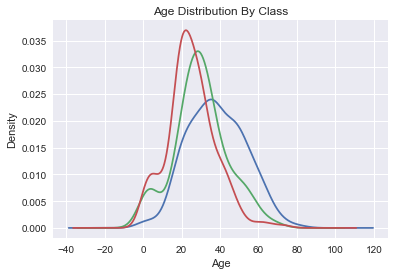

In [18]:
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')

plt.title('Age Distribution By Class')
plt.xlabel('Age')

Age is distributed differently by class, will need to factor this in when populating the missing values.

In [19]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

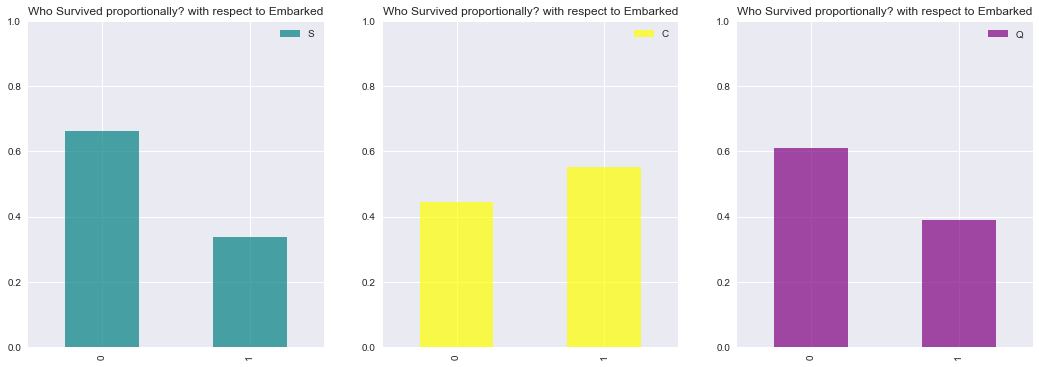

In [20]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 

df_S = df_train['Survived'][df_train.Embarked == 'S'].value_counts().sort_index()
df_C = df_train.Survived[df_train.Embarked == 'C'].value_counts().sort_index()
df_Q = df_train.Survived[df_train.Embarked == 'Q'].value_counts().sort_index()


#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(131)
(df_S/float(df_S.sum())).plot(kind='bar',color='teal',label='S', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Embarked"); plt.legend(loc='best')


ax2 = fig.add_subplot(132)
(df_C/float(df_C.sum())).plot(kind='bar',color='yellow',label='C', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Embarked"); plt.legend(loc='best')


ax2 = fig.add_subplot(133)
(df_Q/float(df_Q.sum())).plot(kind='bar',color='purple',label='Q', alpha=0.7)  
plt.ylim(0,1)
plt.title("Who Survived proportionally? with respect to Embarked"); plt.legend(loc='best')

#ax2.set_ylim(-1, 2)

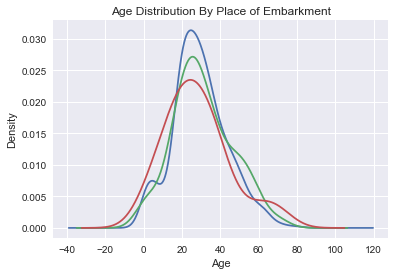

In [21]:
df_train.Age[df_train.Embarked == 'S'].plot(kind='kde')    
df_train.Age[df_train.Embarked == 'C'].plot(kind='kde')
df_train.Age[df_train.Embarked == 'Q'].plot(kind='kde')

plt.title('Age Distribution By Place of Embarkment')
plt.xlabel('Age')

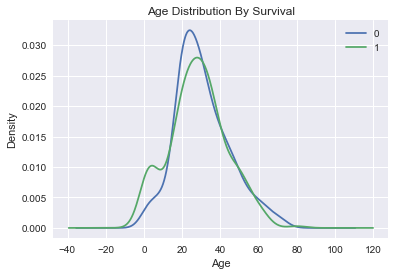

In [22]:
df_train.Age[df_train.Survived.dropna() == 0].plot(kind='kde',label='0')    
df_train.Age[df_train.Survived.dropna() == 1].plot(kind='kde',label='1')

plt.title('Age Distribution By Survival')
plt.xlabel('Age')
plt.legend()

In [23]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch')

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Could this be because mother's and children were given preference?

In [24]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp')

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Could this be because children are more likely to have siblings on the boat, and mothers would have spouses? 

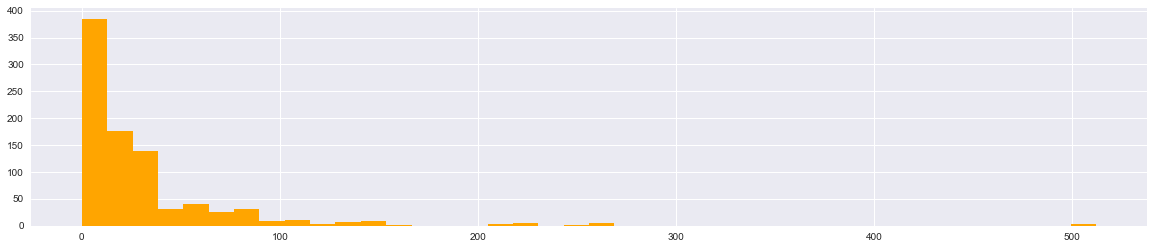

In [25]:
plt.figure(figsize=(2,10))
df_train['Fare'].hist(color='orange',bins=40,figsize=(20,4))

# Imputing values for missing data

Need to impute values for Age in both the training and test sets. Since age is distributed differently for each class, I'd want to take class into consideration when estimating each passengers age.

In [26]:
# Finding the mean age for each class

g = [df_train, test]

train_and_test = pd.concat(g,sort=False)

Mean1 = train_and_test[train_and_test['Pclass']==1]['Age'].mean()

Mean2 = train_and_test[train_and_test['Pclass']==2]['Age'].mean()

Mean3 = train_and_test[train_and_test['Pclass']==3]['Age'].mean()

print(Mean1, Mean2, Mean3)

39.15992957746479 29.506704980842912 24.81636726546906


In [27]:
def age_estimate(passenger):
        Age = passenger[0]
        Pclass = passenger[1]
    
        if pd.isnull(Age):

            if Pclass == 1:
                return Mean1

            elif Pclass == 2:
                return Mean2

            else:
                return Mean3

        else:
            return Age

In [28]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_estimate,axis=1)

In [29]:
test['Age'] = test[['Age','Pclass']].apply(age_estimate,axis=1)

In [30]:
#Dropping cabin column as too many missing variables to compute

df_train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [31]:
#Dropping rows that are null for Embarked as these are difficult to impute 

df_train.dropna(inplace=True)
test.dropna(inplace=True)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Convert categorical features that I want to use in the model, such as Sex, and the location where the passenger embarked.

In [33]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [34]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [35]:
df_train = pd.concat([df_train,sex,embark],axis=1)

test = pd.concat([test,sex_test,embark_test],axis=1)

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.79      0.78       110
          1       0.65      0.63      0.64        68

avg / total       0.73      0.73      0.73       178



In [48]:
logmodel.score(X_train,y_train)

0.8157524613220816

In [49]:
logmodel.score(X_test,y_test)

0.7303370786516854

Not bad but would like to improve on this score

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_predict = rf.predict(X_test)

print(classification_report(y_test,rf_predict))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       110
          1       0.73      0.72      0.73        68

avg / total       0.79      0.79      0.79       178



In [53]:
rf.score(X_test,y_test)

0.7921348314606742

Better!